In [1]:
import os, json
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

In [3]:
# error_rate_list = ["0", "0.00001", "0.0001", "0.001", "0.01", "0.1"]
error_rate_list = ["0"]

power_timeseries_acc_list = []
energy_acc_list = []
mean_power_acc_list = []
duration_acc_list = []
for error_rate in error_rate_list:
    filepath = os.path.join(os.getcwd(), "data", "accuracy", f"error_rate_{error_rate}.json")
    with open(filepath, "r") as f:
        accuracy = json.load(f)["accuracy"]
        power_timeseries_acc_list.append(accuracy["power_timeseries"])
        energy_acc_list.append(accuracy["energy"])
        mean_power_acc_list.append(accuracy["mean_power"])
        duration_acc_list.append(accuracy["duration"])

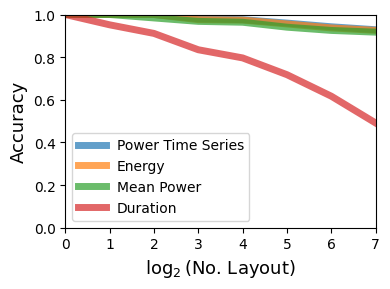

In [14]:
for error_rate_idx, error_rate in enumerate(error_rate_list):
    plt.figure(figsize=(4, 3), dpi=100)

    plt.plot(range(len(power_timeseries_acc_list[error_rate_idx])), power_timeseries_acc_list[error_rate_idx], label="Power Time Series", linewidth=5, alpha=0.7)
    plt.plot(range(len(energy_acc_list[error_rate_idx])), energy_acc_list[error_rate_idx], label="Energy", linewidth=5, alpha=0.7)
    plt.plot(range(len(mean_power_acc_list[error_rate_idx])), mean_power_acc_list[error_rate_idx], label="Mean Power", linewidth=5, alpha=0.7)
    plt.plot(range(len(duration_acc_list[error_rate_idx])), duration_acc_list[error_rate_idx], label="Duration", linewidth=5, alpha=0.7)

    plt.xlabel(r"$\log_{2}$(No. Layout)", fontsize=13)
    plt.xlim((0, 7))
    plt.ylabel("Accuracy", fontsize=13)
    plt.ylim((0, 1))
    plt.tight_layout()
    plt.legend()

    plt.savefig(f"../../paper/figure/user_circuit_identification/error_rate_{error_rate}.pdf")